In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("Breast.csv")

In [4]:

del data['Unnamed: 32']

In [5]:
X = data.iloc[:, 2:].values
y = data.iloc[:, 1].values

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [9]:
classifier = Sequential()

In [10]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Instructions for updating:
Colocations handled automatically by placer.


C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  """


In [11]:
# Adding the second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(p=0.1))

C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  
C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.1)`
  after removing the cwd from sys.path.


In [12]:
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
classifier.fit(X_train, y_train, batch_size=100, nb_epoch=150)

C:\Users\Aarushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Instructions for updating:
Use tf.cast instead.
Epoch 1/150
512/512 [==============================] - 2s 3ms/step - loss: 0.6922 - accuracy: 0.7617
Epoch 2/150
512/512 [==============================] - 0s 64us/step - loss: 0.6892 - accuracy: 0.7148
Epoch 3/150
512/512 [==============================] - 0s 55us/step - loss: 0.6848 - accuracy: 0.7871
Epoch 4/150
512/512 [==============================] - 0s 66us/step - loss: 0.6779 - accuracy: 0.8594
Epoch 5/150
512/512 [==============================] - 0s 61us/step - loss: 0.6677 - accuracy: 0.9121
Epoch 6/150
512/512 [==============================] - 0s 53us/step - loss: 0.6516 - accuracy: 0.9238
Epoch 7/150
512/512 [==============================] - 0s 67us/step - loss: 0.6293 - accuracy: 0.9414
Epoch 8/150
512/512 [==============================] - 0s 51us/step - loss: 0.5983 - accuracy: 0.9434
Epoch 9/150
512/512 [==============================] - 0s 43us/step - loss: 0.5607 - accuracy: 0.9453
Epoch 10/150
512/512 [=============

512/512 [==============================] - 0s 46us/step - loss: 0.0505 - accuracy: 0.9863
Epoch 79/150
512/512 [==============================] - 0s 40us/step - loss: 0.0523 - accuracy: 0.9863
Epoch 80/150
512/512 [==============================] - 0s 48us/step - loss: 0.0511 - accuracy: 0.9863
Epoch 81/150
512/512 [==============================] - 0s 46us/step - loss: 0.0498 - accuracy: 0.9863
Epoch 82/150
512/512 [==============================] - 0s 40us/step - loss: 0.0536 - accuracy: 0.9844
Epoch 83/150
512/512 [==============================] - 0s 36us/step - loss: 0.0540 - accuracy: 0.9863
Epoch 84/150
512/512 [==============================] - 0s 36us/step - loss: 0.0498 - accuracy: 0.9863
Epoch 85/150
512/512 [==============================] - 0s 46us/step - loss: 0.0473 - accuracy: 0.9863
Epoch 86/150
512/512 [==============================] - 0s 47us/step - loss: 0.0476 - accuracy: 0.9883
Epoch 87/150
512/512 [==============================] - 0s 46us/step - loss: 0.0497 - 

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

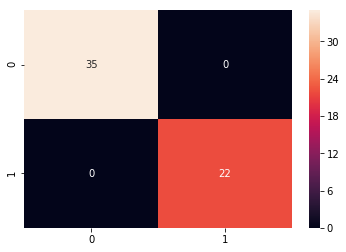

In [17]:
sns.heatmap(cm,annot=True)

In [18]:
print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))

Our accuracy is 100.0%
